In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.stats import poisson

## Shotgun sequencing collector's curve

In [2]:
# genome G - numpy array of size L
L = 1000
G = np.zeros((1000,), dtype=int)

# sequence to this coverage
COVERAGE = 100

In [3]:
# Go!
sampled = []
detections = []
coverages = []

for i in range(L * COVERAGE):
    pos = random.randint(0, L - 1)
    G[pos] += 1
    detection = np.count_nonzero(G) / len(G)

    sampled.append(i)
    detections.append(detection)
    coverages.append(np.sum(G))

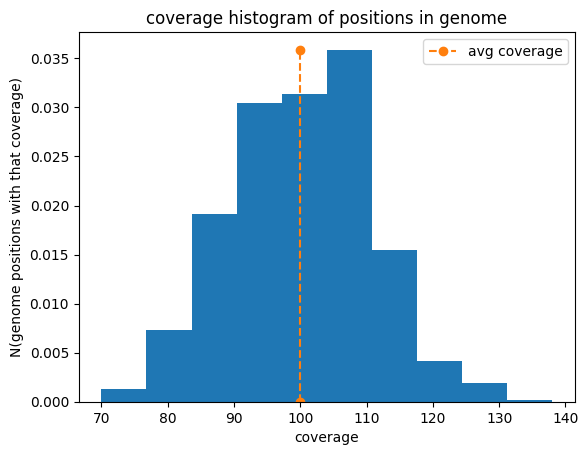

In [4]:
vals = plt.hist(G, density=True, bins=10)
height = max(vals[0])
plt.plot([COVERAGE, COVERAGE], [0, height], 'o--', label='avg coverage')
plt.ylabel('N(genome positions with that coverage)')
plt.xlabel('coverage')
plt.title('coverage histogram of positions in genome')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'fraction of genome detected as sampling increases')

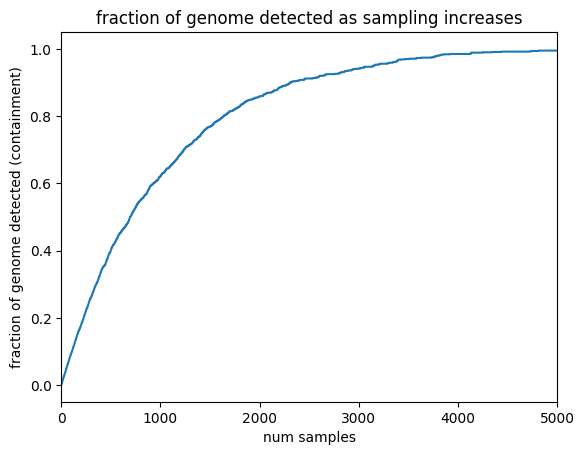

In [5]:
plt.plot(sampled, detections)
plt.xlim((0, 5*L)) # once coverage goes over 5x, it's basically saturated
plt.xlabel('num samples')
plt.ylabel('fraction of genome detected (containment)')
plt.title('fraction of genome detected as sampling increases')